In [45]:
import spacy
import pandas as pd

In [46]:
df = pd.read_csv('train.csv')
df

id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1  
7611  Police investigating after an e-bike collided ...       1  
7612  The Latest: More Homes Razed by Northern Calif...       1  

[7613 rows x 5 columns]

In [47]:
nlp = spacy.load('en_core_web_sm')
def tokenize_delStopwords(text):
    doc = nlp(text)
    tokens_filtered = [token.text for token in doc if len(token.text) <= 3 and not token.is_stop]
    return tokens_filtered

df['tokens_filtered'] = df['text'].apply(tokenize_delStopwords)

In [48]:
all_tokens_without_stopwords = df['tokens_filtered'].explode().tolist()
all_tokens_without_stopwords

['#',
 'La',
 '.',
 "'",
 "'",
 '.',
 '#',
 'got',
 '#',
 '#',
 '#',
 '=',
 '>',
 'Hwy',
 '.',
 '20',
 '-',
 '#',
 '#',
 '#',
 '#',
 ',',
 '...',
 nan,
 '...',
 'far',
 '#',
 '#',
 '#',
 '#',
 '#',
 '#',
 '18',
 '19',
 '.',
 '#',
 '#',
 'bus',
 '80',
 'car',
 '#',
 'man',
 '?',
 nan,
 nan,
 'car',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 nan,
 ';)',
 nan,
 'day',
 '!',
 nan,
 'way',
 '...',
 'eat',
 'NYC',
 '!',
 nan,
 ':)',
 '?',
 'end',
 '!',
 nan,
 'try',
 '.',
 '#',
 '#',
 'RT',
 '#',
 ':',
 ':',
 'set',
 'Aba',
 '.',
 '!',
 'Set',
 'SKY',
 '#',
 'new',
 'set',
 'EPL',
 '.',
 'Set',
 '-',
 '#',
 '\x89ÛÒ',
 'set',
 ':',
 '\x89ÛÓ',
 'St',
 '...',
 ' ',
 ':D',
 ':',
 '#',
 '\n',
 'CFC',
 '.',
 '?',
 '?',
 '?',
 '?',
 '?',
 '?',
 'set',
 '...',
 '!',
 '3',
 '.',
 '?',
 ':',
 nan,
 ':',
 '#',
 '.',
 '.',
 ';',
 '.',
 ':',
 'Man',
 'set',
 'Man',
 '\n',
 '\x89ÛÓ',
 'St',
 'r',
 '...',
 '-',
 ':',
 'Set',
 'El',
 '-',
 "'",
 ':',
 '?',
 '?',
 '.',
 '?',
 '?',
 '?',
 '?',
 '?',
 '?',
 "'",
 '#

In [49]:
corpus = ' '.join(df['text'])
print(corpus[:200])


Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuati


In [50]:
list_of_documents = df['text'].tolist()
list_of_documents

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ',
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires',
 '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas',
 "I'm on top of the hill and I can see a fire in the woods...",
 "There's an emergency evacuation happening now in the building across the street",
 "I'm afraid that the tornado is coming to our area...",
 'Three people died from the heat wave so far',
 'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA 

In [51]:
doc = nlp(corpus)
unique_tokens = set(token.text for token in doc)
print("Nombre de tokens uniques dans le corpus :", len(unique_tokens))

Nombre de tokens uniques dans le corpus : 26708


Ce nombre parait gigantesque

Pour réduire ce nombre de tokens on peut retirer tout les stopwords, retirer toute la ponctuation et les chiffres

In [52]:
from collections import Counter

token_freq = Counter(token.text for token in doc)
singletons = [token for token in token_freq if token_freq[token] == 1]

print("Nombre de tokens uniques qui n'apparaissent qu'une seule fois :", len(singletons))


Nombre de tokens uniques qui n'apparaissent qu'une seule fois : 18511


In [53]:
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
for token in doc:
    print(p_stemmer.stem(token.text))


Our -> our
Deeds -> deed
are -> are
the -> the
Reason -> reason
of -> of
this -> thi
# -> #
earthquake -> earthquak
May -> may
ALLAH -> allah
Forgive -> forgiv
us -> us
all -> all
Forest -> forest
fire -> fire
near -> near
La -> la
Ronge -> rong
Sask -> sask
. -> .
Canada -> canada
All -> all
residents -> resid
asked -> ask
to -> to
' -> '
shelter -> shelter
in -> in
place -> place
' -> '
are -> are
being -> be
notified -> notifi
by -> by
officers -> offic
. -> .
No -> no
other -> other
evacuation -> evacu
or -> or
shelter -> shelter
in -> in
place -> place
orders -> order
are -> are
expected -> expect
13,000 -> 13,000
people -> peopl
receive -> receiv
# -> #
wildfires -> wildfir
evacuation -> evacu
orders -> order
in -> in
California -> california
  ->  
Just -> just
got -> got
sent -> sent
this -> thi
photo -> photo
from -> from
Ruby -> rubi
# -> #
Alaska -> alaska
as -> as
smoke -> smoke
from -> from
# -> #
wildfires -> wildfir
pours -> pour
into -> into
a -> a
school -> school
  ->

In [54]:
for token in nlp(doc):
    print(token.lemma_)

Our -> our
Deeds -> deed
are -> be
the -> the
Reason -> Reason
of -> of
this -> this
# -> #
earthquake -> earthquake
May -> may
ALLAH -> ALLAH
Forgive -> forgive
us -> we
all -> all
Forest -> Forest
fire -> fire
near -> near
La -> La
Ronge -> Ronge
Sask -> Sask
. -> .
Canada -> Canada
All -> all
residents -> resident
asked -> ask
to -> to
' -> '
shelter -> shelter
in -> in
place -> place
' -> '
are -> be
being -> be
notified -> notify
by -> by
officers -> officer
. -> .
No -> no
other -> other
evacuation -> evacuation
or -> or
shelter -> shelter
in -> in
place -> place
orders -> order
are -> be
expected -> expect
13,000 -> 13,000
people -> people
receive -> receive
# -> #
wildfires -> wildfire
evacuation -> evacuation
orders -> order
in -> in
California -> California
  ->  
Just -> just
got -> get
sent -> send
this -> this
photo -> photo
from -> from
Ruby -> Ruby
# -> #
Alaska -> Alaska
as -> as
smoke -> smoke
from -> from
# -> #
wildfires -> wildfire
pours -> pour
into -> into
a -> a


non les deux permetent juste de réduire la taille des mots

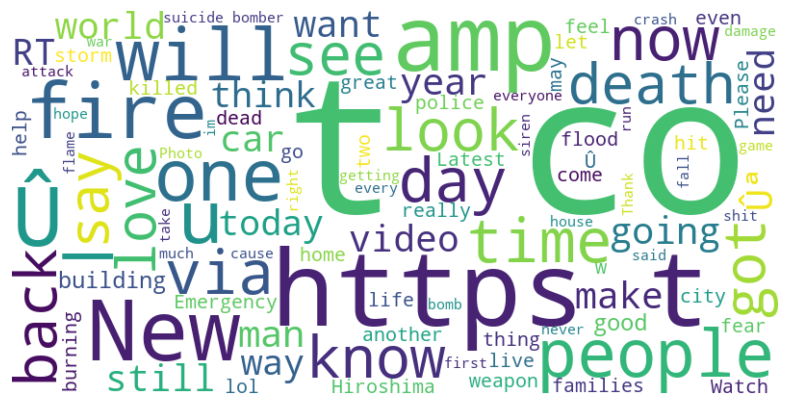

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

corpus = ' '.join(df['text'])
doc = nlp(corpus)

token_freq = Counter(token.text for token in doc)

single_line_text = " ".join([token.replace('\n', ' ') for token in df['text']])

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(single_line_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [62]:
import re

def preprocess_text(text):
    pass
    corpus = ' '.join(text)
    nlp = spacy.load('en_core_web_sm')  
    texts = nlp(corpus)
    preprocessed_text = [re.sub(r'[^a-zA-Z]', '', token.text.lower()) for token in texts if not token.is_stop]
    
    return preprocessed_text

In [63]:
preprocess_text(df['text'])

['deeds',
 'reason',
 '',
 'earthquake',
 'allah',
 'forgive',
 'forest',
 'fire',
 'near',
 'la',
 'ronge',
 'sask',
 '',
 'canada',
 'residents',
 'asked',
 '',
 'shelter',
 'place',
 '',
 'notified',
 'officers',
 '',
 'evacuation',
 'shelter',
 'place',
 'orders',
 'expected',
 '',
 'people',
 'receive',
 '',
 'wildfires',
 'evacuation',
 'orders',
 'california',
 '',
 'got',
 'sent',
 'photo',
 'ruby',
 '',
 'alaska',
 'smoke',
 '',
 'wildfires',
 'pours',
 'school',
 '',
 '',
 'rockyfire',
 'update',
 '',
 '',
 'california',
 'hwy',
 '',
 '',
 'closed',
 'directions',
 'lake',
 'county',
 'fire',
 '',
 '',
 'cafire',
 '',
 'wildfires',
 '',
 'flood',
 '',
 'disaster',
 'heavy',
 'rain',
 'causes',
 'flash',
 'flooding',
 'streets',
 'manitou',
 '',
 'colorado',
 'springs',
 'areas',
 'hill',
 'fire',
 'woods',
 '',
 'emergency',
 'evacuation',
 'happening',
 'building',
 'street',
 'afraid',
 'tornado',
 'coming',
 'area',
 '',
 'people',
 'died',
 'heat',
 'wave',
 'far',
 'haha